In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [41]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_all_tables.csv', sep=',')
df_merged.head(5)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres,overview,poster_path,backdrop_path,popularity,production_companies_name,Director_name,Actors_Actresses
0,tt0069049,De l'autre côté du vent,6.7,8019,2018.0,122.0,Drama,"Surrounded by fans and skeptics, grizzled dire...",/kFky1paYEfHxfCYByEc9g7gn6Zk.jpg,/wXUcSJG6dqNKgIRgqYqX98UA1wz.jpg,8.002,"['SACI', ""Les Films de l'Astrophore""]",Orson Welles,"['Peter Bogdanovich', 'Peter Bogdanovich', 'Pe..."
1,tt0080440,Le Chat noir,5.8,4233,1981.0,92.0,Horror,When a young couple goes missing in a sleepy E...,/69bYJOdhjXXVycXd8mZdlpyYgyr.jpg,/mSdpQhD0AzwKiwGiWhMqn04XbWB.jpg,6.053,"['Selenia Cinematografica', 'Italian Internati...",Lucio Fulci,"['Mimsy Farmer', 'Mimsy Farmer', 'Mimsy Farmer..."
2,tt0080509,Celles qu'on n'a pas eues...,5.7,176,1981.0,105.0,Comedy,"In a train compartment, 6 people who do not kn...",/nuZVeqegSWiPC67fKobuH3kWQKx.jpg,/gkoBsJ871p9OCaCZFqfCAPIyLTc.jpg,1.508,"['Téléma', 'Les Films Français', 'Nordine FIlm...",Pascal Thomas,"['Michel Aumont', 'Michel Aumont', 'Michel Aum..."
3,tt0080536,Les âges du coeur,5.7,691,1981.0,106.0,Drama,"A 60-year-old artist shares a secret, platonic...",/1AMXUHd4hVtHwS5e0BDSjFVPEMV.jpg,/5i7ijXF35GJsBEucYut0PwR1e5D.jpg,2.783,"['Film Consortium of Canada', 'Milton Zyrman P...",Jules Dassin,"['Richard Burton', 'Richard Burton', 'Richard ..."
4,tt0080554,Colegas,6.5,694,1982.0,98.0,Drama,The plot follows the misadventures of two youn...,/2ANdbBwmYdPQkWbc2NsAOAkGEZt.jpg,/obqdSsF9PPdKPhapBeI9drGTWhM.jpg,1.924,['Ópalo Films'],Eloy de la Iglesia,"['Queta Ariel', 'Queta Ariel', 'Queta Ariel', ..."


In [42]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                       int64
startYear                    float64
runtimeMinutes               float64
genres                        object
overview                      object
poster_path                   object
backdrop_path                 object
popularity                   float64
production_companies_name     object
Director_name                 object
Actors_Actresses              object
dtype: object

In [43]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes,popularity
count,4734.000000,4.734000e+03,4734.000000,4734.000000,4734.000000
mean,6.370194,1.123763e+04,2007.474229,103.239544,5.827385
std,0.723375,7.299382e+04,11.985751,15.335438,22.093123
min,5.000000,1.010000e+02,1981.000000,85.000000,0.600000
25%,5.800000,3.142500e+02,1999.000000,93.000000,1.400000
50%,6.400000,8.225000e+02,2010.000000,100.000000,2.720500
75%,6.900000,2.875250e+03,2018.000000,110.000000,5.950250
max,9.300000,2.878611e+06,2024.000000,238.000000,1107.559000


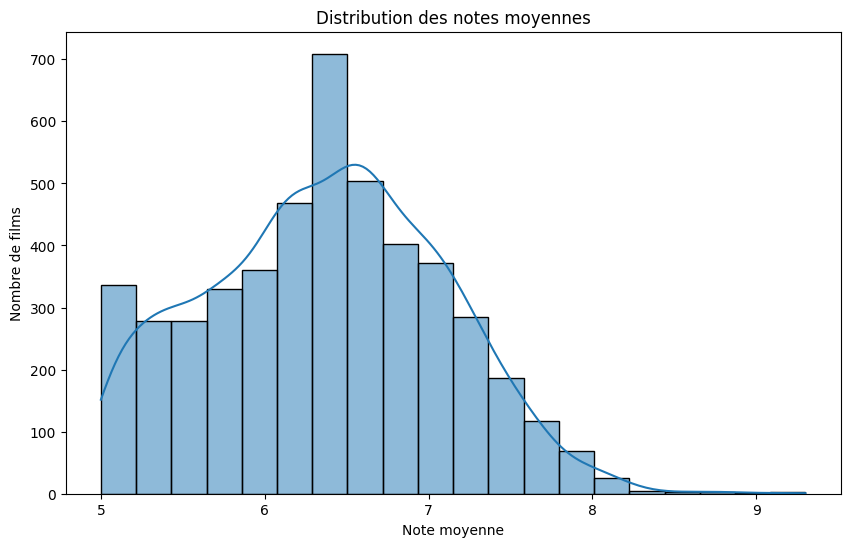

In [61]:
# Moyenne des notes
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['averageRating'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


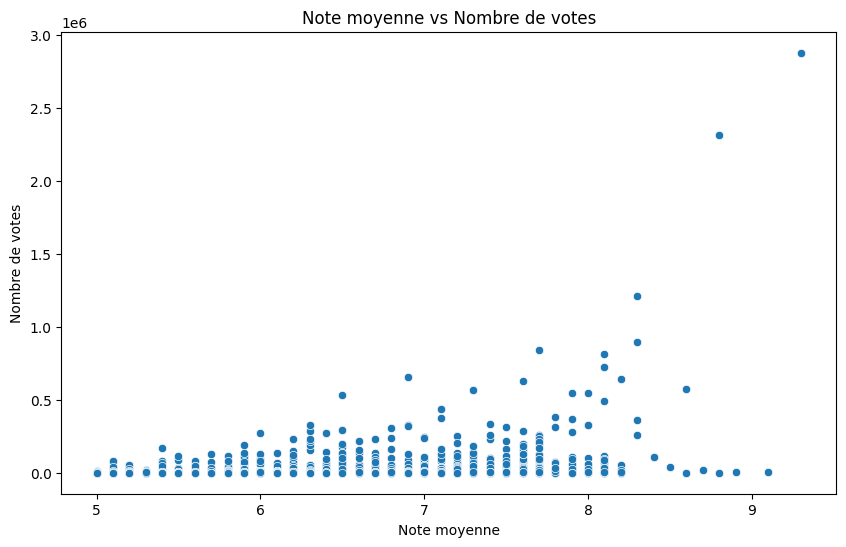

In [60]:
# Moyenne entre le nombre de votes et la moyenne des notes

plt.figure(figsize=(10, 6))
sns.scatterplot(x='averageRating', y='numVotes', data=df_merged)
plt.title('Note moyenne vs Nombre de votes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de votes')
plt.show()


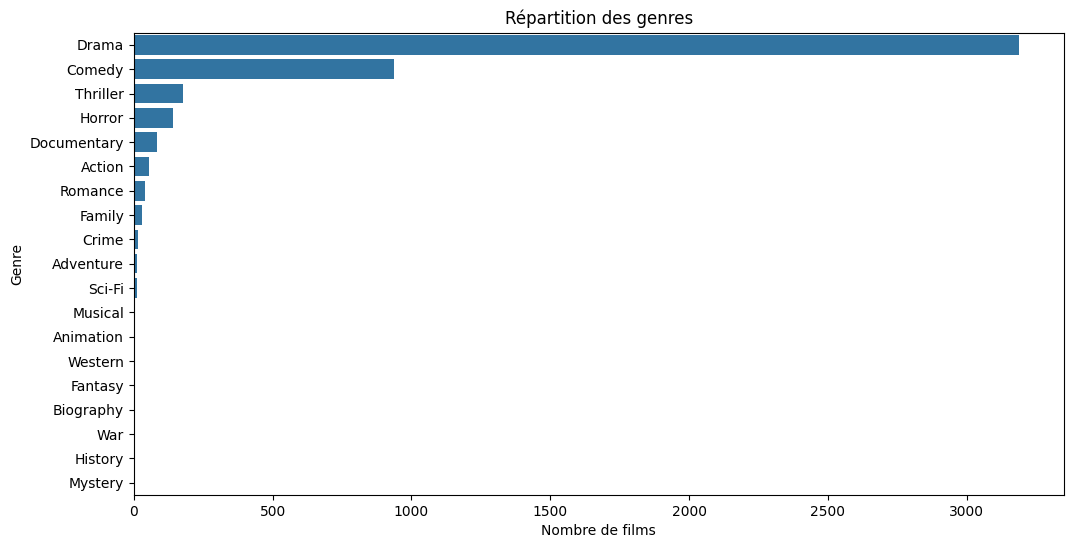

In [44]:
# Diagramme en barres pour les genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['genres'], order = df_merged['genres'].value_counts().index)
plt.title('Répartition des genres')
plt.xlabel('Nombre de films')
plt.ylabel('Genre')
plt.show()


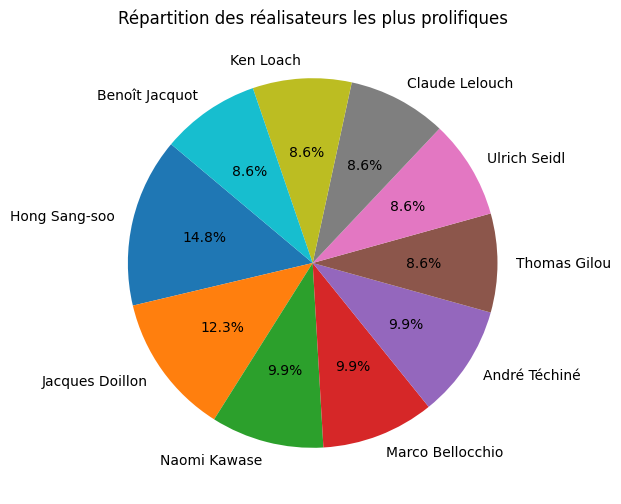

In [55]:
# Diagramme en barres pour les réalisateurs les plus sollicités
# Ajouter les années
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [ ]:
# Diagramme en barres pour les acteurs les plus sollicités

# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES DE LEURS FILMS

In [58]:
# Compagnies de production les plus populaires



In [ ]:
# Nombres de films pa année de sortie de  film

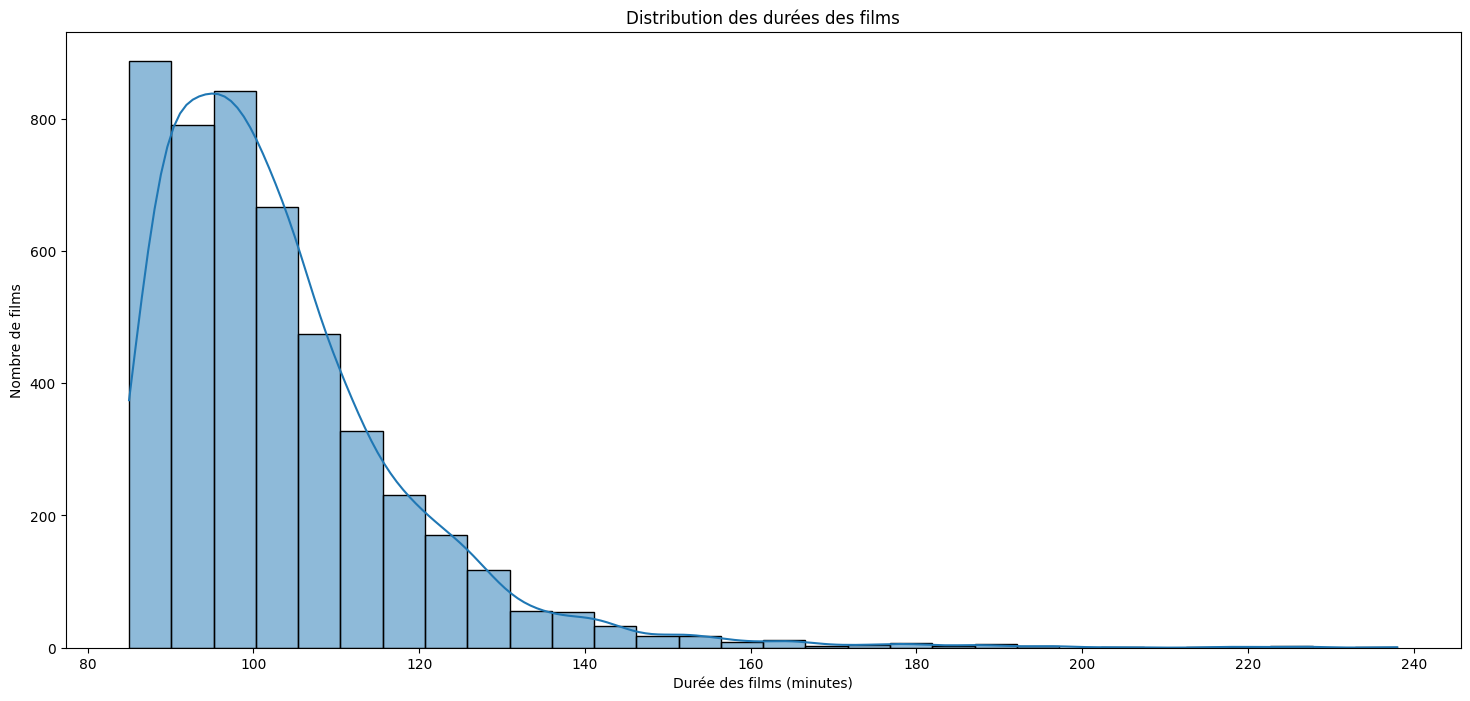

In [47]:
# Distribution des durées des films par le nombre de films

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées des films')
plt.xlabel('Durée des films (minutes)')
plt.ylabel('Nombre de films')
plt.show()



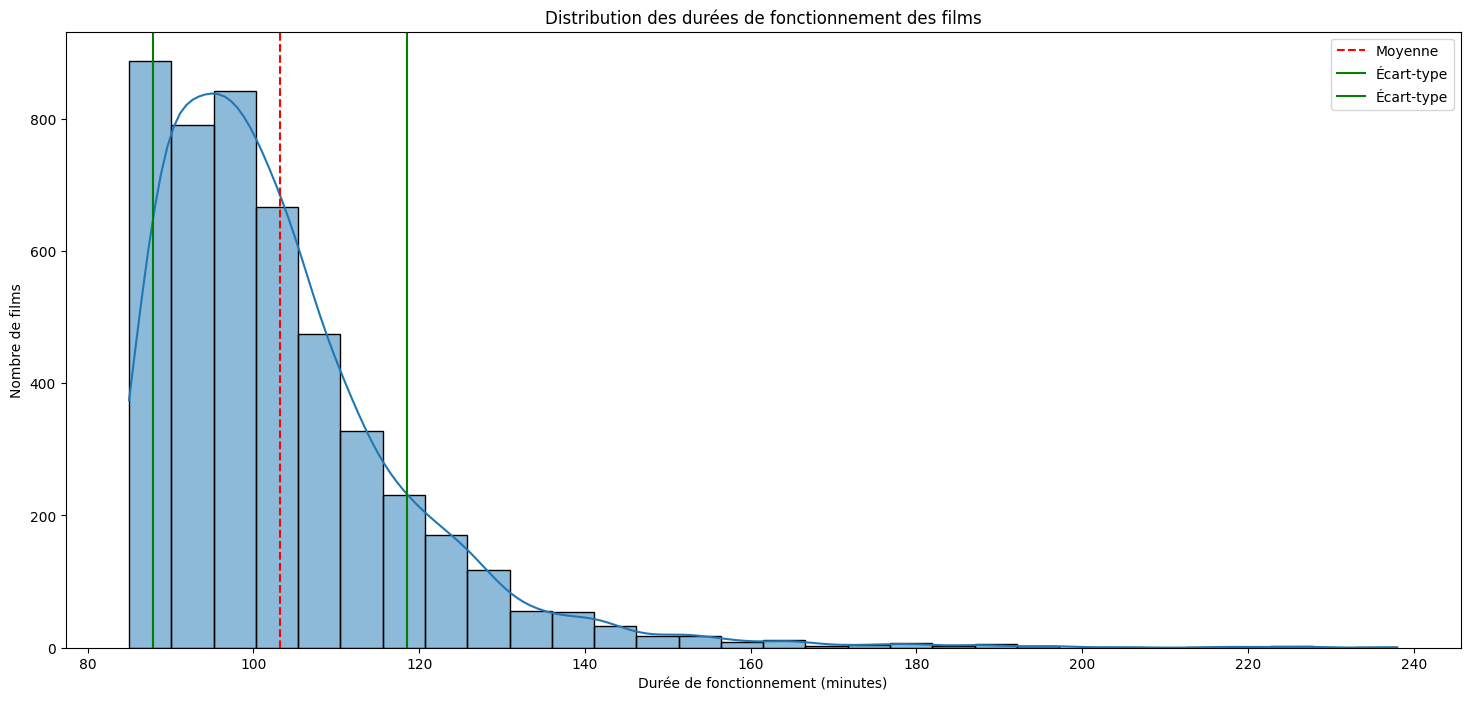

In [48]:
# Calcul de la moyenne et de l'écart-type

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées de  des films')
plt.xlabel('Durée de fonctionnement (minutes)')
plt.ylabel('Nombre de films')

# Calcul de la moyenne et de l'écart-type
mean = df_merged['runtimeMinutes'].mean()
std_dev = df_merged['runtimeMinutes'].std()

# Tracer la moyenne et les lignes pour l'écart-type
plt.axvline(mean, color='r', linestyle='--', label='Moyenne')
plt.axvline(mean + std_dev, color='g', linestyle='-', label='Écart-type')
plt.axvline(mean - std_dev, color='g', linestyle='-', label='Écart-type')

plt.legend()
plt.show()
